# Project 2 - Supervised Machine Learning

**Data Description**: The csv contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

**Domain**: Banking

**Context**: This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

**Attribute Information**
* **`ID`**: Customer ID
* **`Age`**: Customer's age in completed years
* **`Experience`** : #years of professional experience
* **`Income`**: Annual income of the customer (thousand dollars)
* **`ZIP Code`**: Home Address ZIP code.
* **`Family`**: Family size of the customer
* **`CCAvg`**: Avg. spending on credit cards per month (thousand dollars)
* **`Education`**: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* **`Mortgage`**: Value of house mortgage if any. (thousand dollars)
* **`Personal Loan`**: Did this customer accept the personal loan offered in the last campaign?
* **`Securities Account`**: Does the customer have a securities account with the bank?
* **`CD Account`**: Does the customer have a certificate of deposit (CD) account with the bank?
* **`Online`**: Does the customer use internet banking facilities?
* **`Credit card`**: Does the customer use a credit card issued by bank

**Learning Outcomes**
* Exploratory Data Analysis
* Preparing the data to train a model
* Training and making predictions using a classification model
* Model evaluation

## 1) Importing the Necessary libraries

In [1]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
import seaborn as sns # Why sns?  It's a reference to The West Wing
sns.set(color_codes=True)#setting the default seaborn style for our plots
%matplotlib inline 

In [2]:
## Read the data into the notebook
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head(n=7)#printing the first 7 rows of dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0


## 2) Basic EDA
* Find the shape of the data,data type of individual columns
* Check the presence of missing values
* Descriptive stats of numerical columns
* Find the distribution of numerical columns and the asssociated skeweness and presence of outliers 
* Distribution of categorical columns

In [3]:
df.shape

(5000, 14)

In [4]:
df.info()  #info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* **`Conclusion`**: From the above cells we can understand that the data has 5000 instances with 14 attributes ( 13 integer type and 1 float type )

In [5]:
df.apply(lambda bankdata : sum(bankdata.isnull()))   #null value check

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

* **`Conclusion`**: There are no null values in any of the column

In [6]:
df.describe(percentiles=[0.10,0.25,0.50,0.75,0.90]).T   # five point summary of the continuous attributes and also
                                                        #additional percentiles

,count,mean,std,min,10%,25%,50%,75%,90%,max
ID,5000.0,2500.500000,1443.520003,1.0,500.9,1250.75,2500.5,3750.25,4500.1,5000.0
Age,5000.0,45.338400,11.463166,23.0,30.0,35.00,45.0,55.00,61.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,4.0,10.00,20.0,30.00,36.0,43.0
Income,5000.0,73.774200,46.033729,8.0,22.0,39.00,64.0,98.00,145.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,90275.0,91911.00,93437.0,94608.00,95138.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,1.00,2.0,3.00,4.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.3,0.70,1.5,2.50,4.3,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,1.00,2.0,3.00,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.00,0.0,101.00,200.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.00,0.0,0.00,0.0,1.0


***`Conclusion:`***

* **`ID`**: categorical attribute (lowest=1 and highest=5000)
* **`Age`**: numerical attribute (lowest age=23 and highest age=67)
* **`Experience`**: numerical variable ( 0 means no experience , 1 means one year of experience and so on. Min experience in the dataset = -3 which is an error in data and max experience = 43.)
* **`Income`**: numerical attribute with income = 0 means no income. Min income = 8,000 dollars while the maximum income = 224,000 dollars.(Here income is given in thousand dollars scale)
* **`ZIP Code`**: categorical attribute.
* **`Family`**: categorical attribute with  Lowest family size = 1 and highest family size = 4.
* **`CCAvg`**: numerical attribute. Min average spending on credit cards per month = zero dollars and maximum = 10,000 dollars.
* **`Education`**: categorical attribute (1: Undergrad; 2: Graduate; 3: Advanced/Professional).
* **`Mortgage`**: numerical attribute. Min mortage value in the dataset = 0 dollars, i.e. no house mortage, and maximum value = 635,000 dollars.
* **`Personal Loan`**:  target variable. categorical attribute (binary values),. If the customer accepted the personal loan offered in the last campaign then 1 else 0.
* **`Securities Account`**: categorical attribute(binary values). If the customer has a securities account with the bank then 1 else 0.
* **`CD Account`**: categorical attribute (binary values). If the customer has a certificate of deposit (CD) account with the bank then 1 else 0.
* **`Online`**: categorical attribute(binary values). If the customer uses internet banking facilities then 1 else 0.
* **`CreditCard`**: categorical attribute(binary values). If the customer use a credit card issued by UniversalBank then 1 else 0.



* **`Additional observations about remaining description parameters:`**
* Income variable has some potential outliers on the higher end and the lower end. This can be seen because of the sudden jump in min and 10% percentile. Similar jump is present in 75% and 90% and between 90% and max.
* ZIP Code being a nominal variable, the description doesn't convey any meaning.
* CCAvg has some potential outliers on the higher end. This can be seen because of a sudden jump between 90% and max value
* Mortgage description shows that at least 50% entries don't have any mortgage. There's also a potential outlier on the higher end. This can be seen because of the sudden jump in 90% and max value.


In [7]:
df.nunique() #checking unique values of data

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

* **`Conclusion`**: The number of unique elements for Family, Education, Personal Loan, Securities Account, CD Account, Online and CreditCard variables show that they are categorical variables.

In [8]:
df['Personal Loan'].value_counts() #understanding the target variable

0    4520
1     480
Name: Personal Loan, dtype: int64

* **`Conclusion`**: Among 5,000 customers, only 480 (=9.6%) accepted the personal loan that was offered to them in the earlier campaign.

#### Before we perform univariate analysis let us first look at experience column and perform data cleaning since it has negative values

In [9]:
(df['Experience']<0).sum()

52

* **`Conclusion`**: Here we observed that there are 52 entries in Experience column that has negative entries.


* **Now we can try 3 methods**
* 1)Replace negative entries with mean or median
* 2)Drop the negative values
* 3)Replace with absolute value


* I will go with replacement because we have a small dataset i.e only 5000 entries. I don't want to lose my data

In [10]:
#Before we proceed furthur let's understand the columns with negative values
df[df['Experience']<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


* **`Conclusion`**: Here we can understand that all the negative entries have their ages between 23 and 29

In [11]:
#let's try with mean or median
print(df['Experience'].mean()) #finding mean of experience attribute
print(df['Experience'].median()) #finding median of experience attribute

#we can observe that both mean and median are 20 for experience attribute

20.1046
20.0


* **`Conclusion`**: We can't replace the values with mean or median because a person whose age is between 23 and 29 won't have 20 years of experience. This indicates there may be an error while recording the entries. Therefore I replace the entries with absolute value

In [12]:
# Replacing with absolute values
df['Experience']=abs(df['Experience'])
print((df['Experience']<0).sum()) #verifying if the replacement happened

0


* **`Conclusion`**: Here we can notice that all negative entries are now replaced with positive entries


### Now our dataset is clean and it's time for univariate analysis

In [13]:
def unilateralAnalysis(attributename, categorical=False):
    # For categorical attributes, plot a countplot
    if categorical:
        sns.countplot(df[attributename])
        plt.show()
    else:
        plt.subplot(2,2,1)
        # Distribution Plot
        sns.distplot(df[attributename])
        plt.subplot(2,2,2)
        # Boxplot
        sns.boxplot(df[attributename])
        plt.show()
        print("Mean: {:.2f}".format(df[attributename].mean()))

* **`Conclusion`**: Here I have just defined a function so that I can use it through out the code instead of repeating again.This function plots count plot for categorical variables and distribution and boxplots for numerical variables

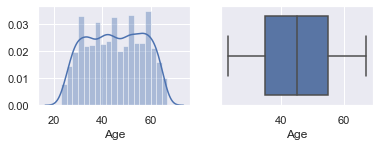

Mean: 45.34
None


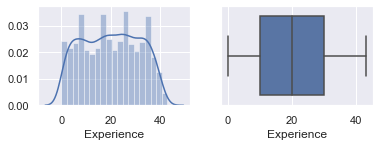

Mean: 20.13
None


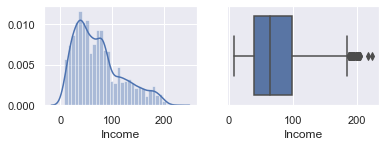

Mean: 73.77
None


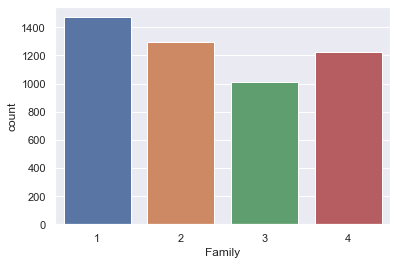

None


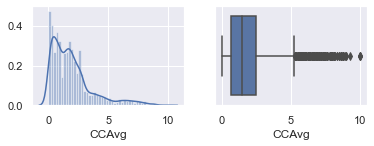

Mean: 1.94
None


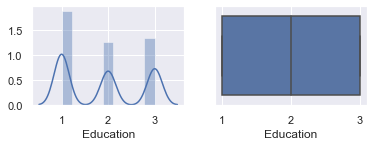

Mean: 1.88
None


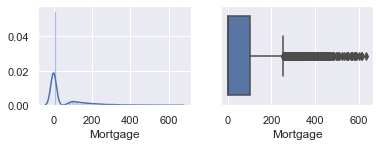

Mean: 56.50
None


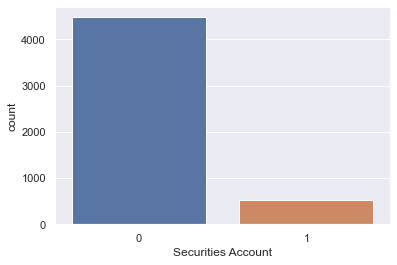

None


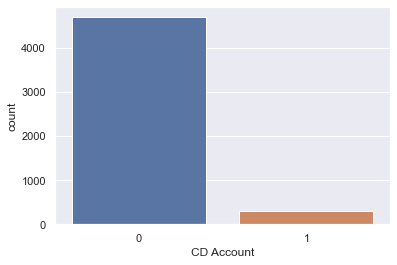

None


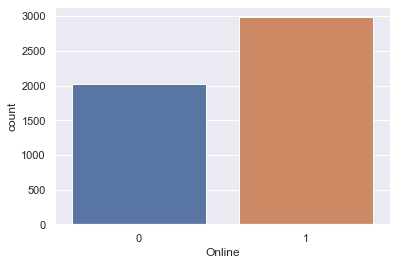

None


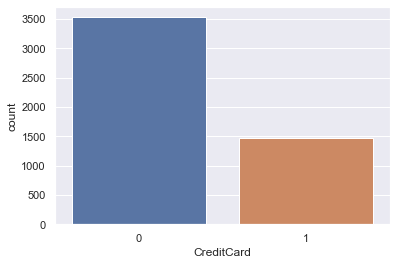

None


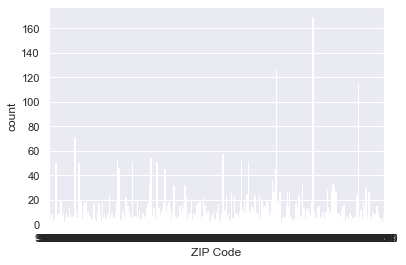

None


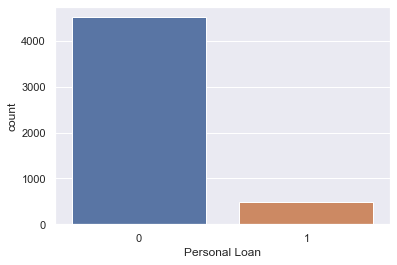

None


In [14]:
print(unilateralAnalysis('Age'))
print(unilateralAnalysis('Experience'))
print(unilateralAnalysis('Income'))
print(unilateralAnalysis('Family',categorical=True))
print(unilateralAnalysis('CCAvg'))
print(unilateralAnalysis('Education'))
print(unilateralAnalysis('Mortgage'))
print(unilateralAnalysis('Securities Account',categorical=True))
print(unilateralAnalysis('CD Account',categorical=True))
print(unilateralAnalysis('Online',categorical=True))
print(unilateralAnalysis('CreditCard',categorical=True))
print(unilateralAnalysis('ZIP Code',categorical=True))
print(unilateralAnalysis('Personal Loan',categorical=True))

* **`Conclusion`**
* Age follows an approximately normal distribution. The mean and median are same.
* Experience also follows an approximately normal distribution. Also note that there are some entries with negative experience which should be removed.
* As we had mentioned before, Income has some outliers which need to be removed. Also, it can be seen that Income is positively skewed (Mean is greater than median).
* CCAvg is also positively skewed and has some outliers that can be removed.
* As can be seen from the above plots, majority of customers don't have a mortgage and the maximum mortgage is very high and can be removed.
* Family variable is evenly distributed.
* The data for Education is evenly distributed to a large extent. Most customers hold an unergrad level education.
* The data for Securities Account is unevenly distributed. Most people don't have a Securities Account.
* CD Account data is also unevenly distributed. Most people don't have a CD Account.
* For both Online and CreditCard, the data is slightly unevenly distributed.

### Since we have understood the univariate analysis, let's continue to understand the effect they have on the target variable and their relationship between each other.

In [15]:
def CategoricalAnalysis(attributename, countplot=False, variable2 = None):
    if countplot:
        sns.countplot(x=attributename,data=df,hue='Personal Loan')
        plt.show()
    else:
        # Boxplot
        sns.boxplot(x=attributename,y=variable2,hue='Personal Loan',data=df)
        plt.show()

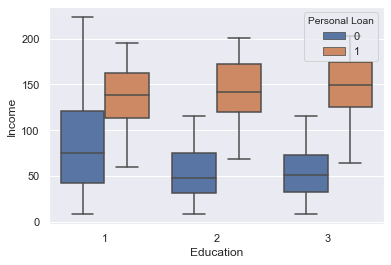

None


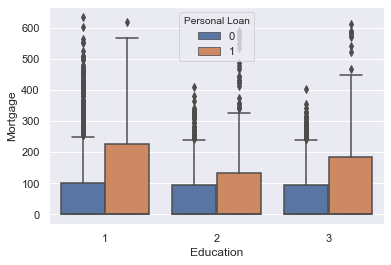

None


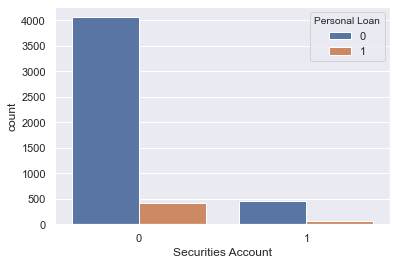

None


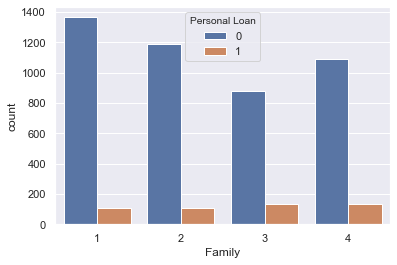

None


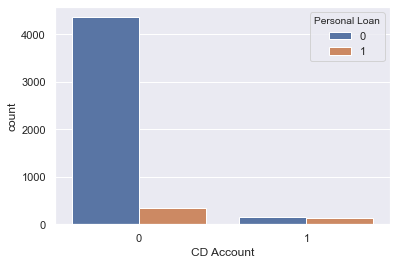

None


In [16]:
print(CategoricalAnalysis("Education",False,"Income"))
print(CategoricalAnalysis("Education",False,"Mortgage"))
print(CategoricalAnalysis("Securities Account",True))
print(CategoricalAnalysis("Family",True))
print(CategoricalAnalysis("CD Account",True))

* **`Conclusion`**:
* Note that as expected, people with higher income tend to go for the personal loan. The difference is larger as the education level increases from 1 to 3. Also note that the income levels for the people who opted for the loan have a similar income spread irrespective of their education level.
* As expected, people with higher mortgage tend to go for a personal loan. The reason can be so that they can pay back the mortgage.

* Compared to customers having a personal loan, more of those who don't have a personal loan have a securities account. But, the customers having a securities account is very low irrespective of whether they have taken a personal loan or not.
* Number of family members doesn't seem to have any significant effect on the number of customers who opted for personal loan. But, if we focus on the ratio of people who didn't opt for the loan and those who opted for the loan, customers with family size 3 are most likely to opt for the loan.
* Almost all customers who have a CD Account have a personal loan whereas if a customer doesn't have a CD Account, the likelihood of the customer have a personal loan is very low.


<AxesSubplot:xlabel='CCAvg'>

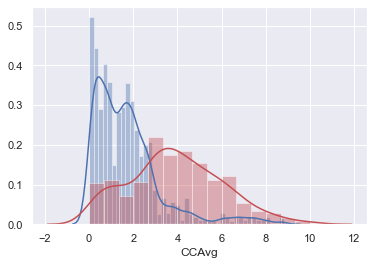

In [17]:
#Distribution plot of Personal Loan
sns.distplot( df[df["Personal Loan"] == 0]['CCAvg'], color='b')
sns.distplot( df[df["Personal Loan"] == 1]['CCAvg'], color='r')

* **`Conclusion`**: Customers with higher credit card average have a higher likelihood of having a personal loan. This can also be understood because a credit card is similar to a personal loan (one with a very short tenure) to a large extent. So if a customer is spending higher amount of money with a credit card, they have a higher chance to opt for a personal loan and pay the amount back later.

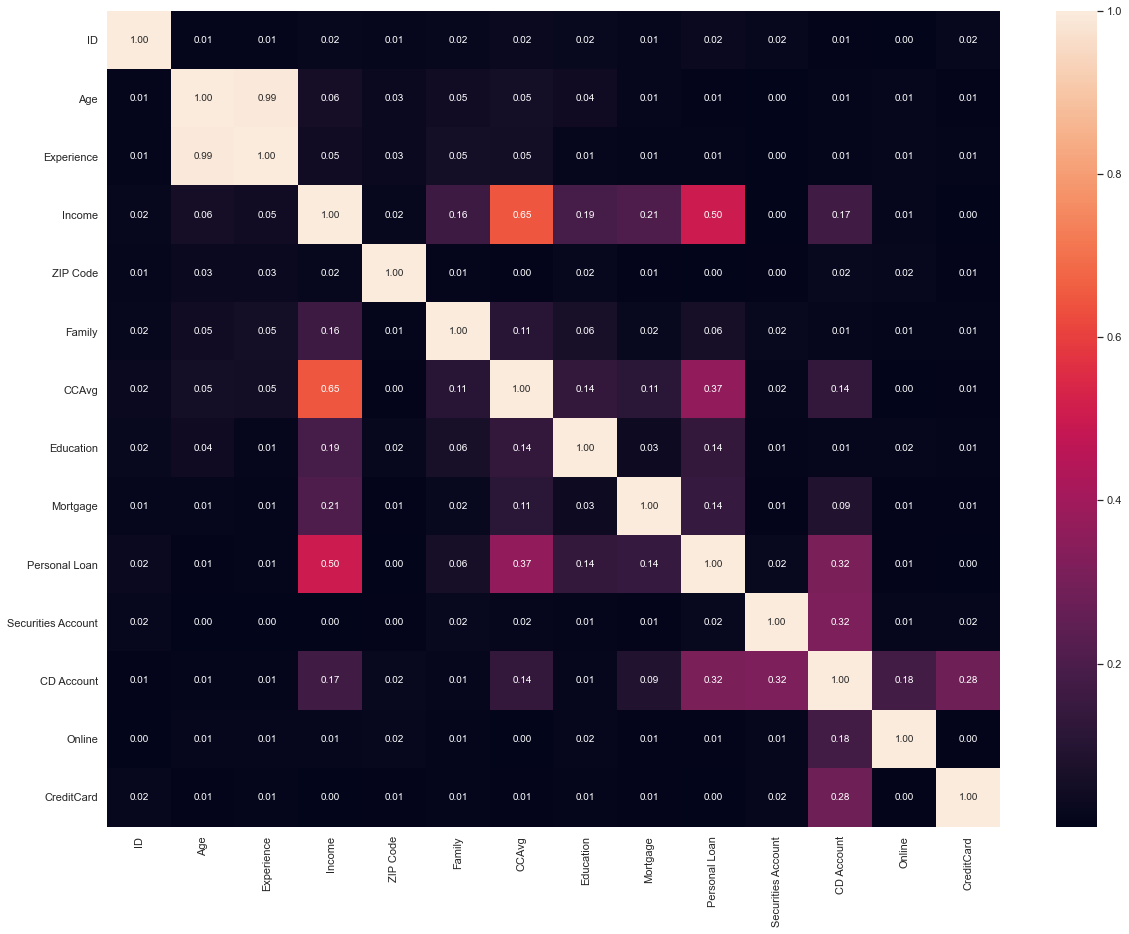

In [18]:
#Heatmap of dataset
plt.figure(figsize=(20,15))
sns.heatmap(np.abs(df.corr()), annot=True, fmt=".2f")
plt.show()

* From the above heatmap, we can see that both Age, Experience and Income, CC Avg have a positive correlation.
I will drop Experience variable.

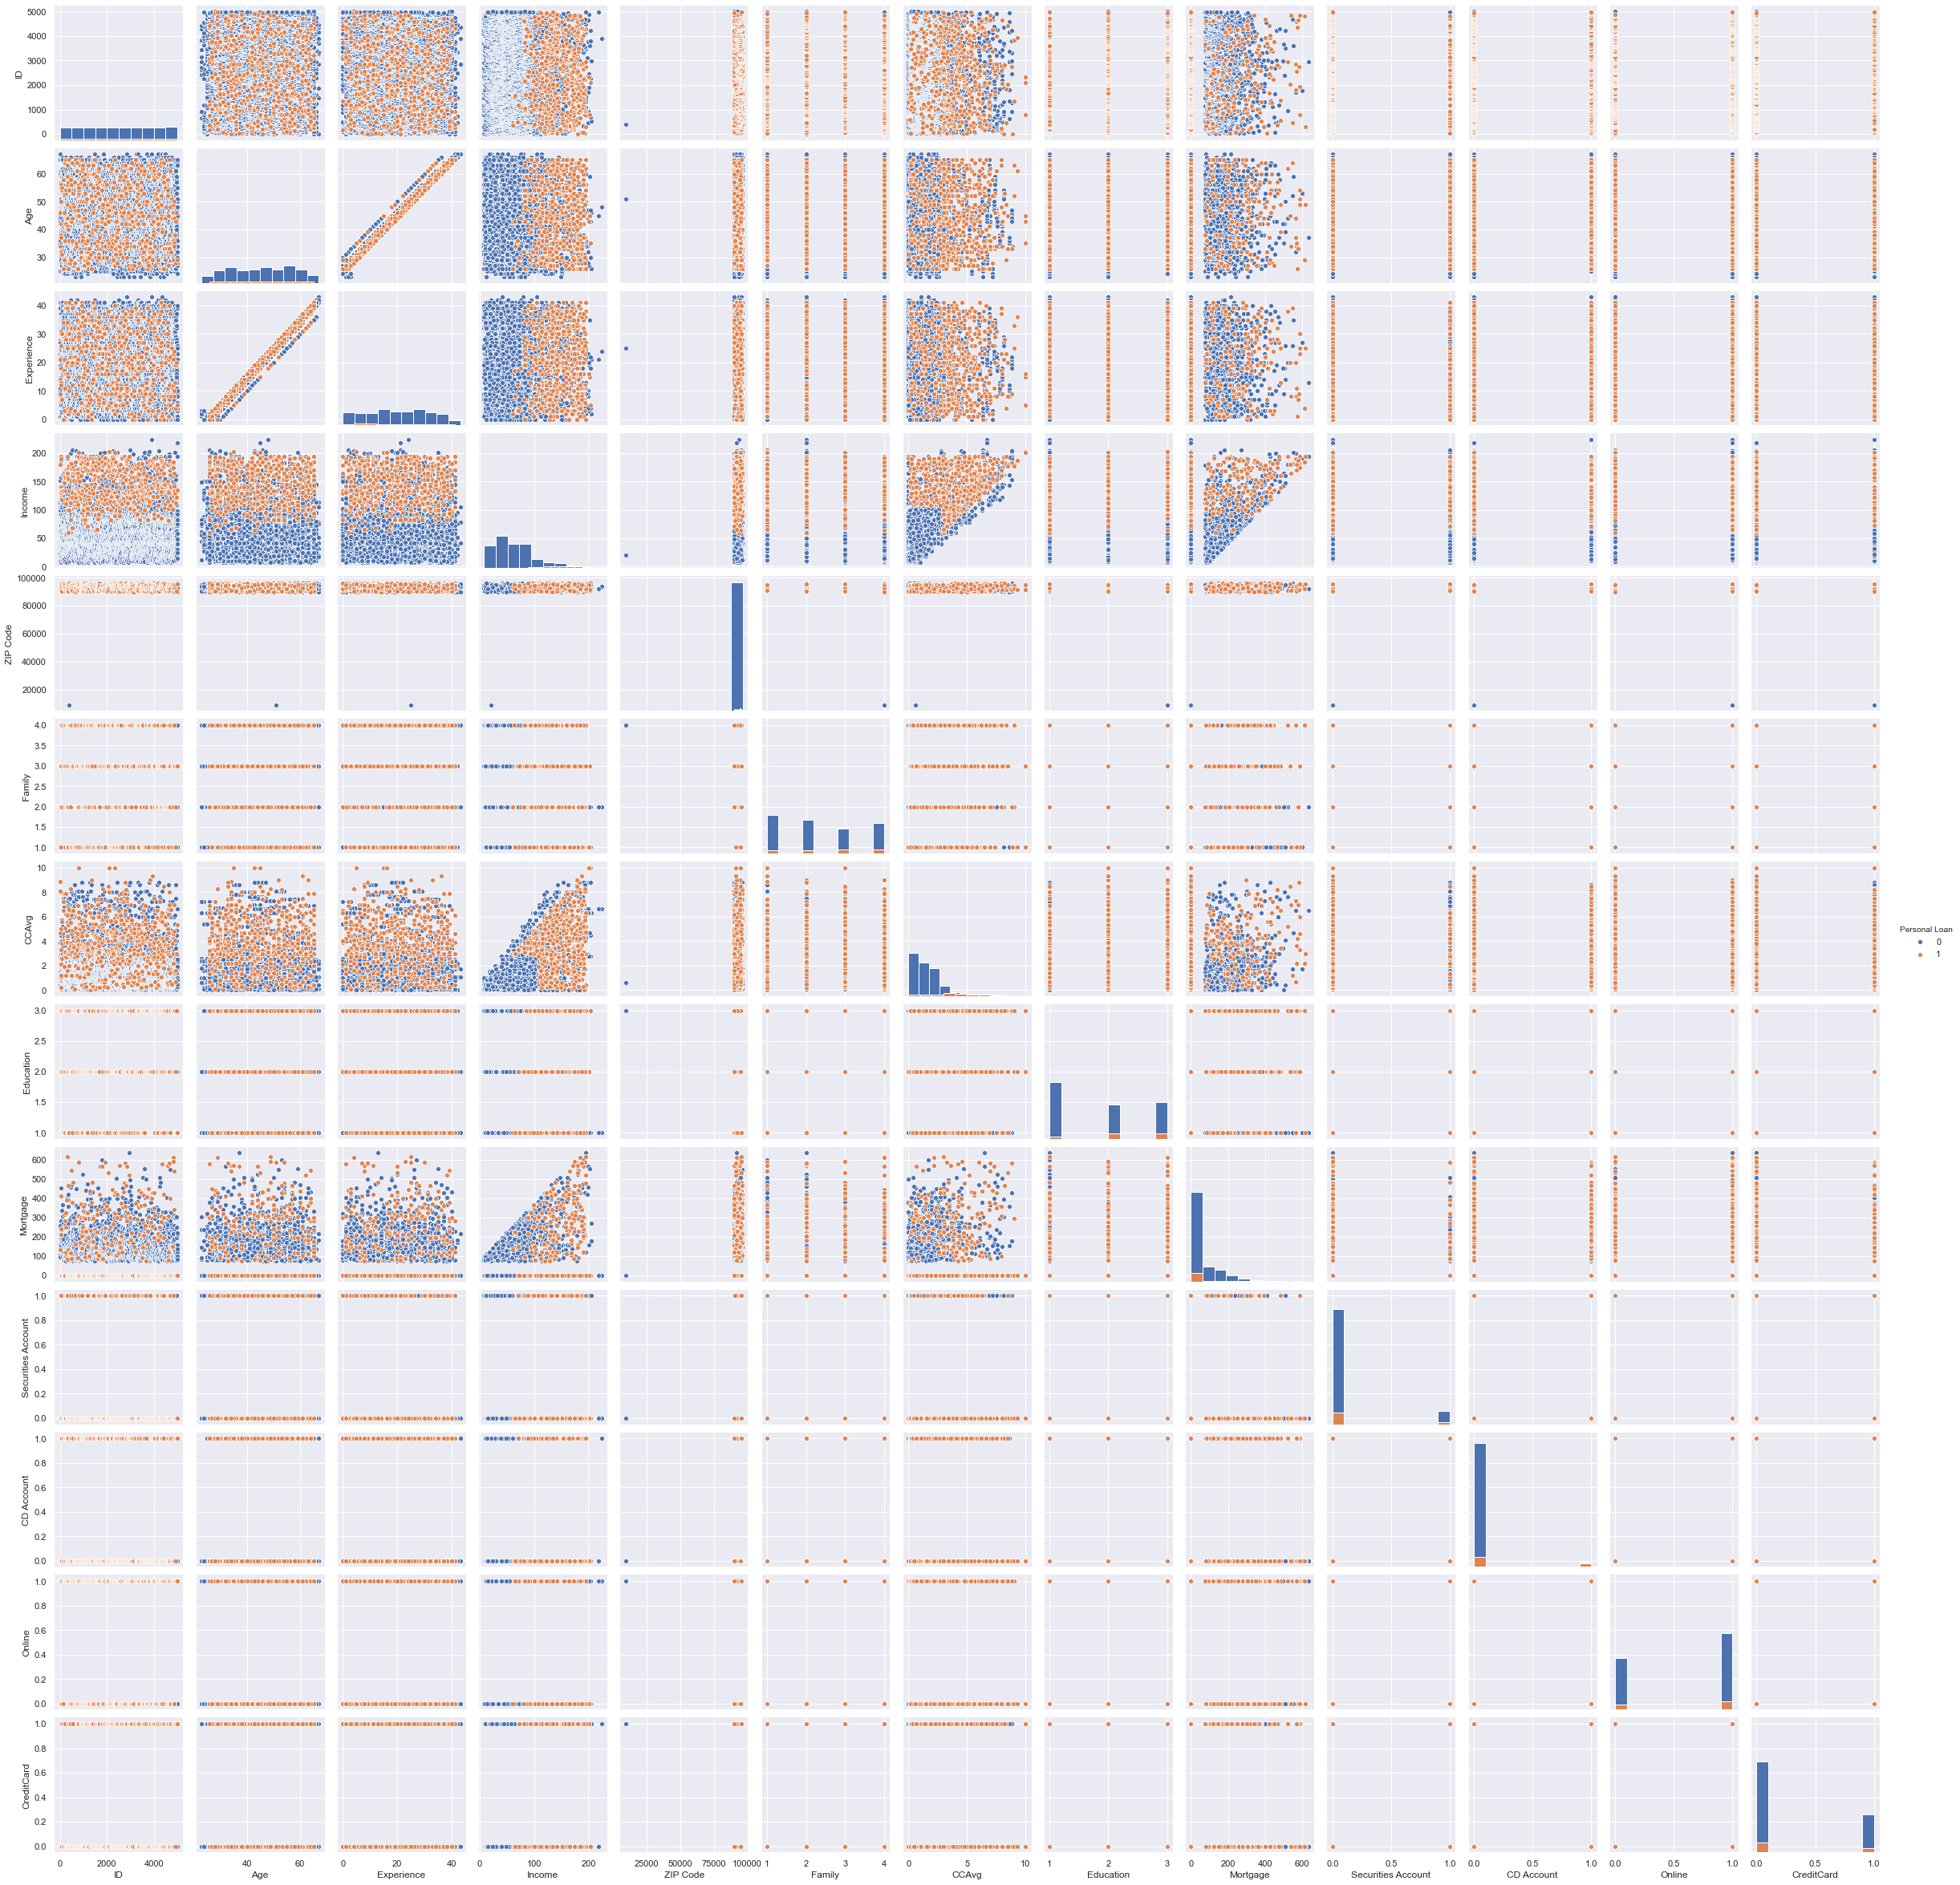

In [19]:
# Pairplot
sns.pairplot(df,hue='Personal Loan',diag_kind='hist')

## Now let's fit the model

## Model 1: Logistic Regression

In [20]:
from sklearn.model_selection import train_test_split #importing necessary libraries

In [21]:
#Lets check split of data

In [22]:
# We want a 70:30 split
# Specify a random state so that the results can be generated again
train, test = train_test_split(df.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=1)
# 1 is just any random seed number

In [23]:
X_train = train.drop("Personal Loan",axis=1)
y_train = train["Personal Loan"]
X_test = test.drop("Personal Loan",axis=1)
y_test = test["Personal Loan"]

In [24]:
X_train.shape, X_test.shape #finding shape of training and testing data of X attributes

((3500, 11), (1500, 11))

In [25]:
y_train.shape, y_test.shape  #finding shape of training and testing data of Y attribute

((3500,), (1500,))

In [26]:
# Let's also normalize the values.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# 1)Logistic Regression
from sklearn.linear_model import LogisticRegression # Fit the model on train
from sklearn.metrics import confusion_matrix, classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)#fitting logistic regression to dataset
score = lr.score(X_test, y_test)
score

0.9486666666666667

In [28]:
score = lr.score(X_train, y_train)#accuracy score
score

0.9534285714285714

* **`Conclusion`**:And a similar accuracy on the train set. So we know that the model didn't overfit the data.

In [29]:
confusion_matrix(y_test, lr.predict(X_test))#plotting confusion matrix

array([[1336,   15],
       [  62,   87]])

The confusion matrix

True Positives (TP): we correctly predicted that they do have diabetes 1336

True Negatives (TN): we correctly predicted that they don't have diabetes 87

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 62 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 87 Falsely predict negative Type II error

In [30]:
print(classification_report(y_test, lr.predict(X_test)))#calculation precision recall scores

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.85      0.58      0.69       149

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.95      0.95      0.94      1500



## Model 2: KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier #importing libraries

In [32]:
from sklearn.metrics import accuracy_score #importing libraries

In [33]:
knn = KNeighborsClassifier(n_neighbors=5) #no. of neighbours=5

In [34]:
knn.fit(X_train,y_train) #fitting the knn model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
y_pred = knn.predict(X_test) #predicting on test set
acc = accuracy_score(y_pred, y_test)
acc

0.9513333333333334

In [36]:
y_pred = knn.predict(X_train) #predicting on training set
acc = accuracy_score(y_pred, y_train)
acc

0.9722857142857143

In [37]:
confusion_matrix(y_test, knn.predict(X_test))

array([[1343,    8],
       [  65,   84]])

In [38]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.91      0.56      0.70       149

    accuracy                           0.95      1500
   macro avg       0.93      0.78      0.84      1500
weighted avg       0.95      0.95      0.95      1500



## Model 3: Guassian Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB #importing libraries

In [40]:
nb = GaussianNB() 
nb.fit(X_train, y_train) #fitting the model

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
y_pred = nb.predict(X_test) #predicting on test set

In [42]:
nb.score(y_test.values.reshape(-1,1), y_pred.reshape(-1,1))#finding accuracy

0.8646666666666667

In [43]:
y_pred = nb.predict(X_train)#predicting on training set

nb.score(y_train.values.reshape(-1,1), y_pred.reshape(-1,1))

0.8705714285714286

In [44]:
confusion_matrix(y_test, nb.predict(X_test)) #plotting confusion matrix


array([[1230,  121],
       [  67,   82]])

In [45]:
print(classification_report(y_test, nb.predict(X_test))) #plotting report

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.40      0.55      0.47       149

    accuracy                           0.87      1500
   macro avg       0.68      0.73      0.70      1500
weighted avg       0.89      0.87      0.88      1500



## Model Tree: Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier #importing libraries

In [47]:
dt=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt.fit(X_train,y_train) #fitting decision tree to dataset

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
dt.score(X_test , y_test) #finding accuracy on test set

0.972

In [49]:
dt.score(X_train, y_train) #finding accuracy on training set

0.9831428571428571

* **`Conclusion`**:
* Logistic Regression accuracy on test set = 94.86%
* KNN accuracy on test set = 95.13%
* Guassian Naive Bayes accuracy on test set = 86.46%
* Decision Tree accuracy on test set = 97.2